# Задание

* Попробовать найти и показать различные инсайты в этом датасете с помощью графиков Seaborn, Matplotlib и Plotly
* Дополнить графики комментариями

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [2]:
import pandas as pd
from pylab import rcParams
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [3]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
len(df)

50000

 <font size = 5>Для начала проанилизируем выборку</font>

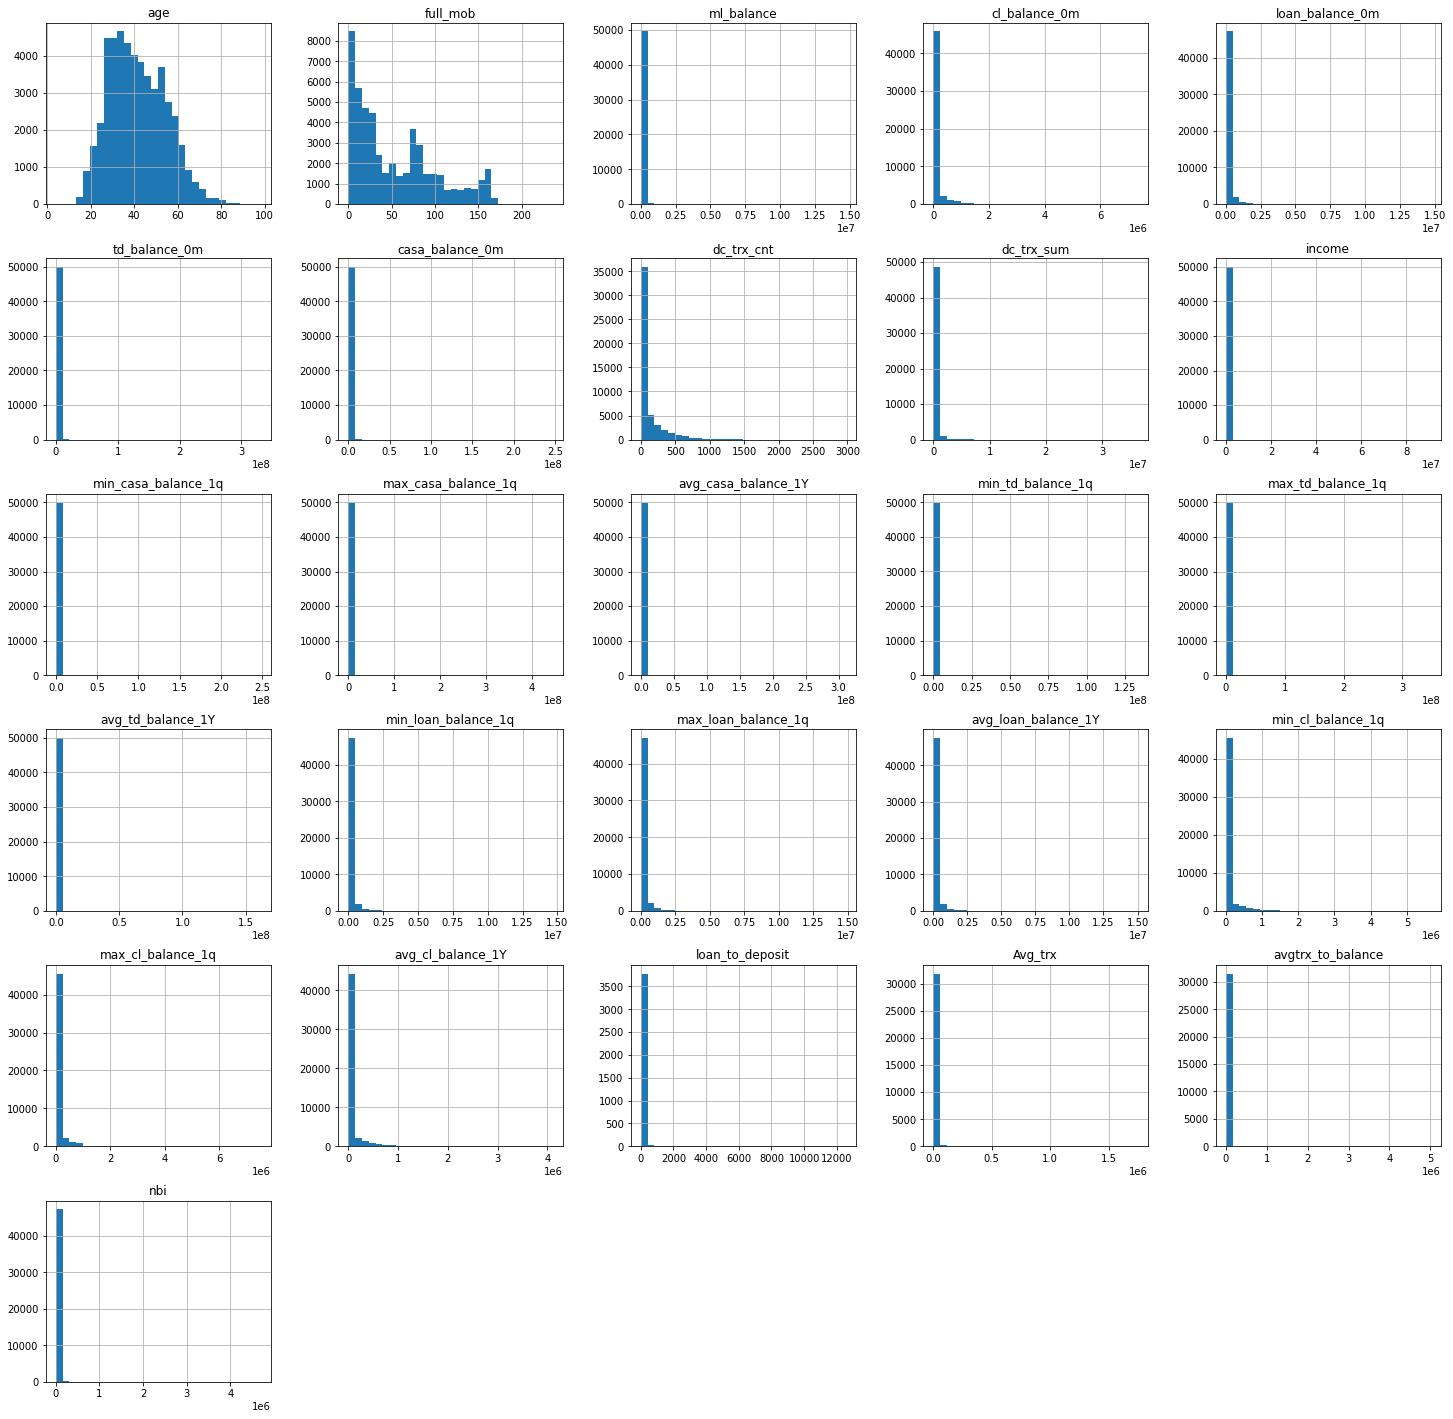

In [54]:
df.hist(bins=30, figsize=(25, 25));

 <font size = 4>Почти все параметры имееют огромное количество нулевых и около нулевых значений, но при этом максимальное достигает 1е6 - 1е8
   Это повод прологарифмировать эти параметры<br>

</font>

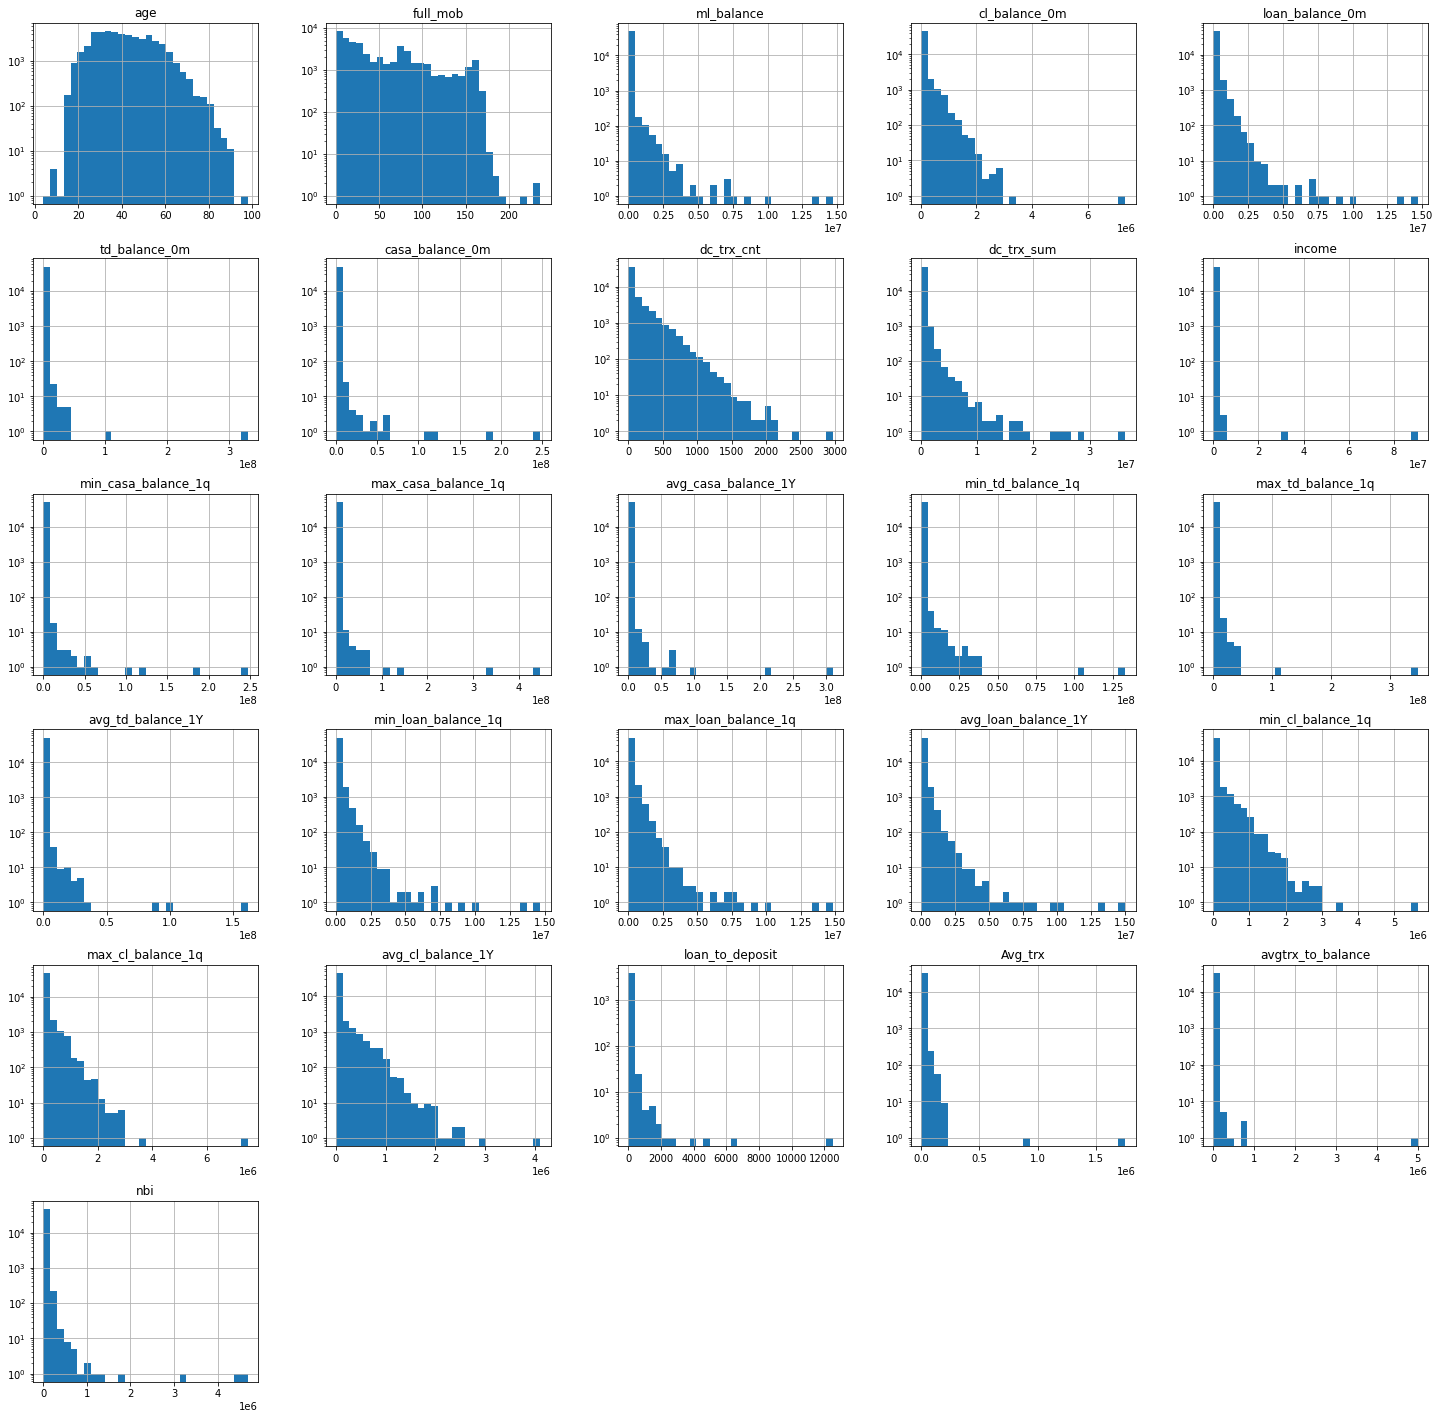

In [66]:
# comp_arr = np.arange(26)
df.hist(bins=30, figsize=(25, 25), log=True);

Но группа около нулевых всё ещё превалирует Оценим отдельно эту группу

In [67]:
# df = df.apply(lambda x: np.log10(x) if df.columns.get_loc(x.name) != 0 and df.columns.get_loc(x.name) != 1 and df.columns.get_loc(x.name) != 7 and df.columns.get_loc(x.name) != 22 else x)

In [68]:
zero_income = df.loc[df.income == 0]
len(zero_income)

26781

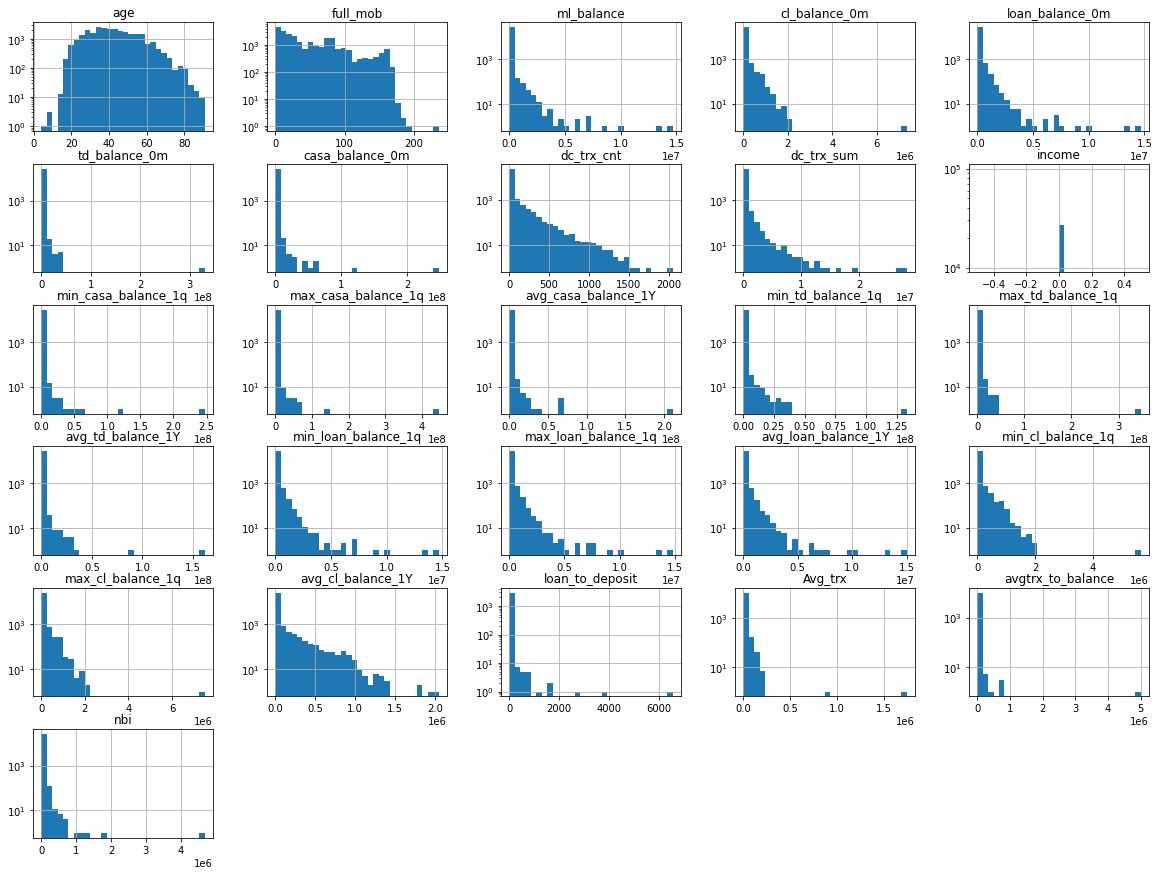

In [69]:
zero_income.hist(bins=30, figsize=(20, 15), log=True);

Свойства распределений практически не изменились. При этом группа занимает более половины обьема выборки
Рассмотрим подруппу имеющие не нулевые параметры кредита

In [6]:
non_zero_credit = zero_income.loc[df.cl_balance_0m != 0]
len(non_zero_credit)

3069

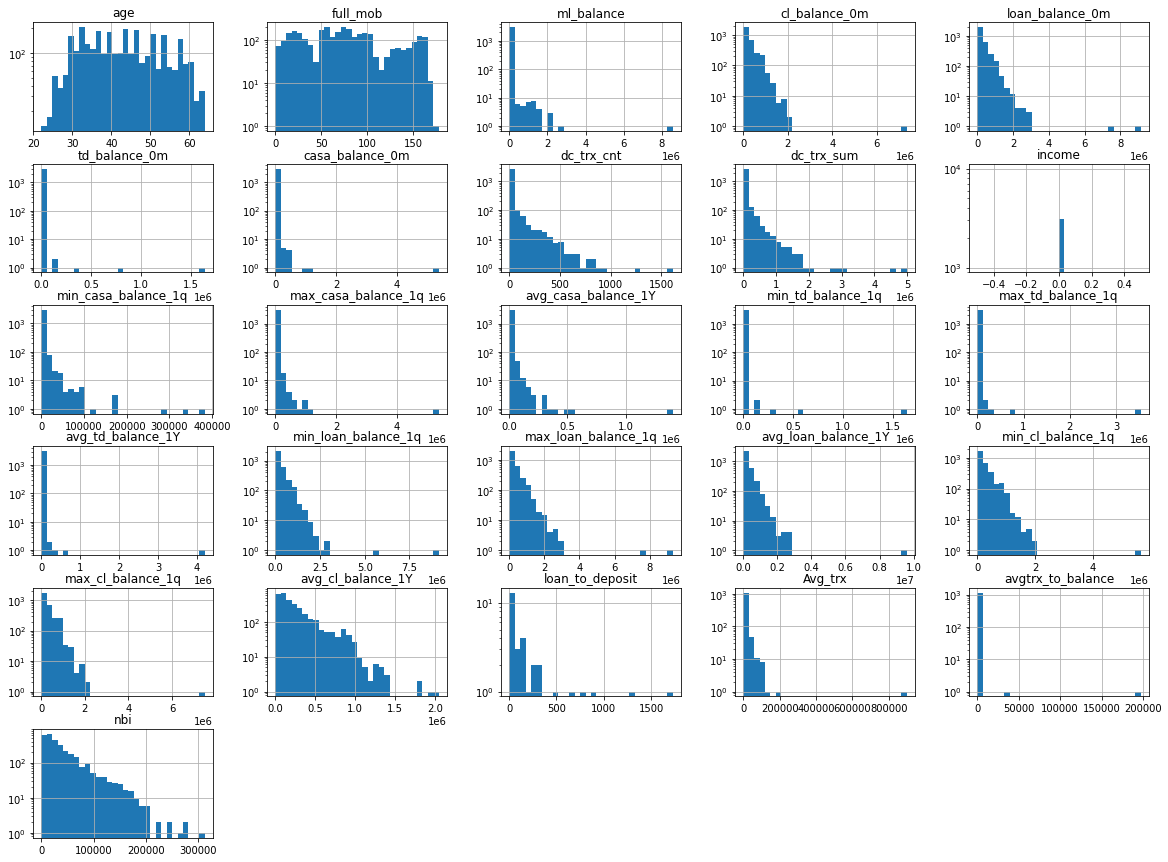

In [70]:
non_zero_credit.hist(bins=30, figsize=(20, 15), log=True);


В этой выборке появляются значимые параметры nbi и avg_cl_balance_1Y, распределение логарифма которых линейно
В то же самое время сильно поменялось распределение возрастов как и распределение длительности взаимоотношений с банком

Рассмотрим теперь группу в ненулевым доходом

In [8]:
non_zero_income = df.loc[df.income != 0]
len(non_zero_income)

23219

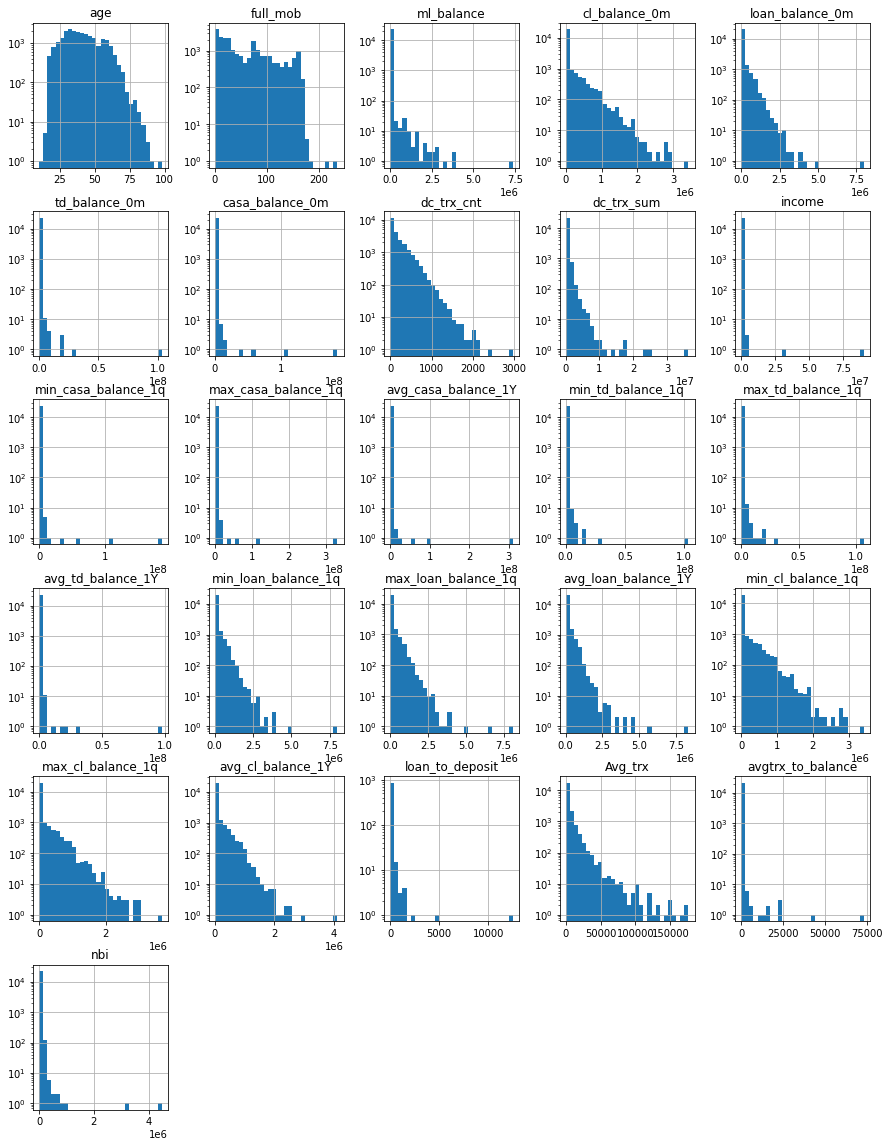

In [71]:
non_zero_income.hist(bins=30, figsize=(15, 20), log=True);

В этой группе мы наблюдаем четкое линейное распределение у логарифма dc_trx_cnt, а также задатки такого же 
распределения у cl_balance_0m и loan_balance_0m

Логарифм Avg_trx как будто продолжает логарифмически

Рассмотрим подгруппу с ненулевым кредитом

In [10]:
non_zero_loan = non_zero_income.loc[df.loan_balance_0m != 0]
len(non_zero_loan)

6374

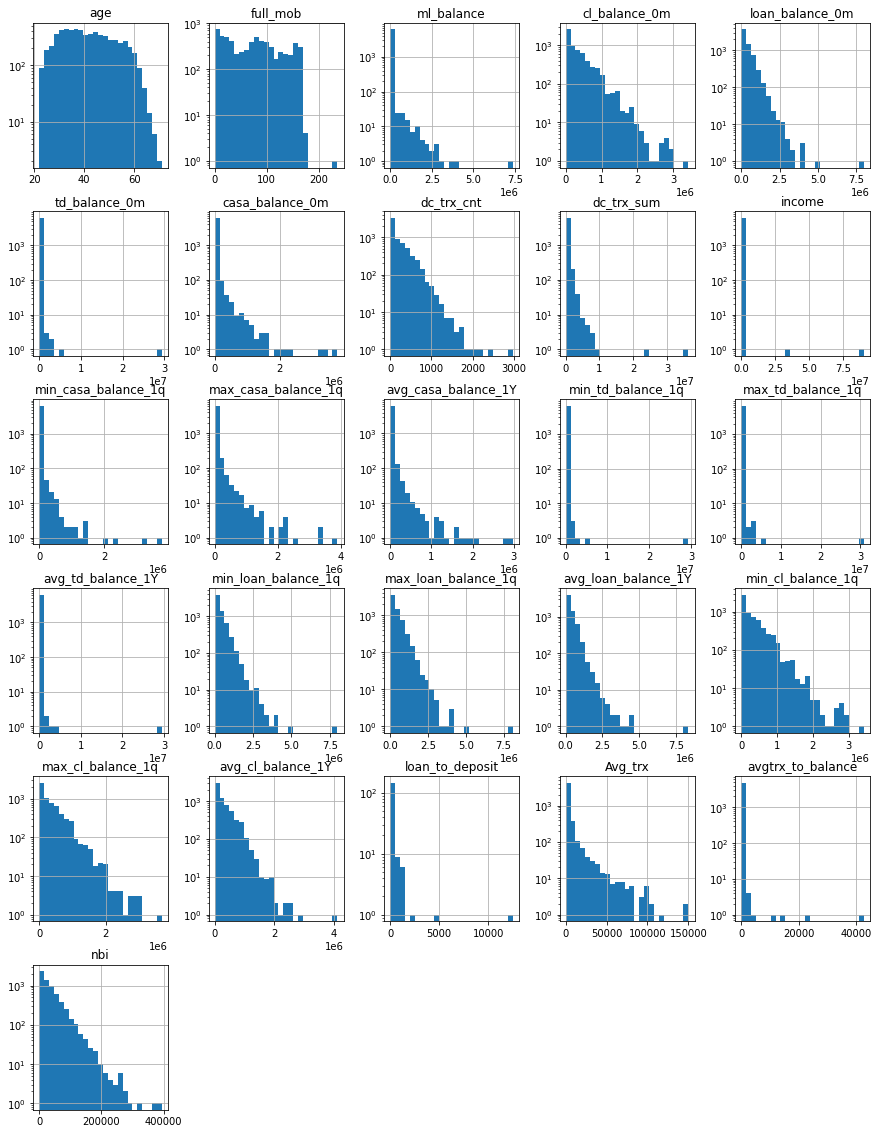

In [72]:
non_zero_loan.hist(bins=25, figsize=(15, 20), log=True);

Здесь целый ряд параметров логарифмически убывает и самое время посмотреть корреляции этих параметров

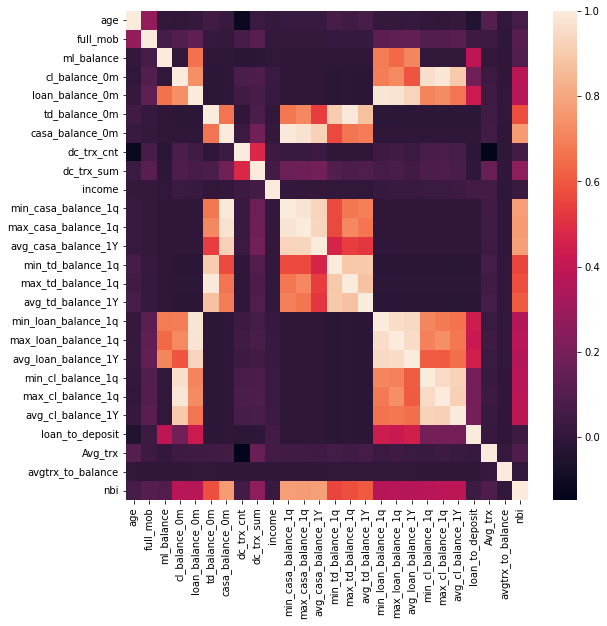

In [97]:
corr = df.corr()
sns.heatmap(corr);

Как видно целый ряд параметров достаточно ярко коррелируют, рассмотрим их отдельно

In [106]:
corr[corr>=.8]

,age,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_mob,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ml_balance,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cl_balance_0m,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.960047,0.985302,0.901052,NaN,NaN,NaN,NaN
loan_balance_0m,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,0.979519,0.977384,0.932125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
td_balance_0m,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
casa_balance_0m,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dc_trx_cnt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dc_trx_sum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


cl_balance_0m, min_cl_balance_1q, max_cl_balance_1q и avg_cl_balance_1Y коррелируют между собой<br>
loan_balance_0m, min_loan_balance_1q, max_loan_balance_1q и	avg_loan_balance_1Y также коррелируют<br>
casa_balance_0m, min_casa_balance_1q, max_casa_balance_1q и avg_casa_balance_1Y также коррелируют<br>
td_balance_0m, min_td_balance_1q, max_td_balance_1q, avg_td_balance_1Y также коррелируют

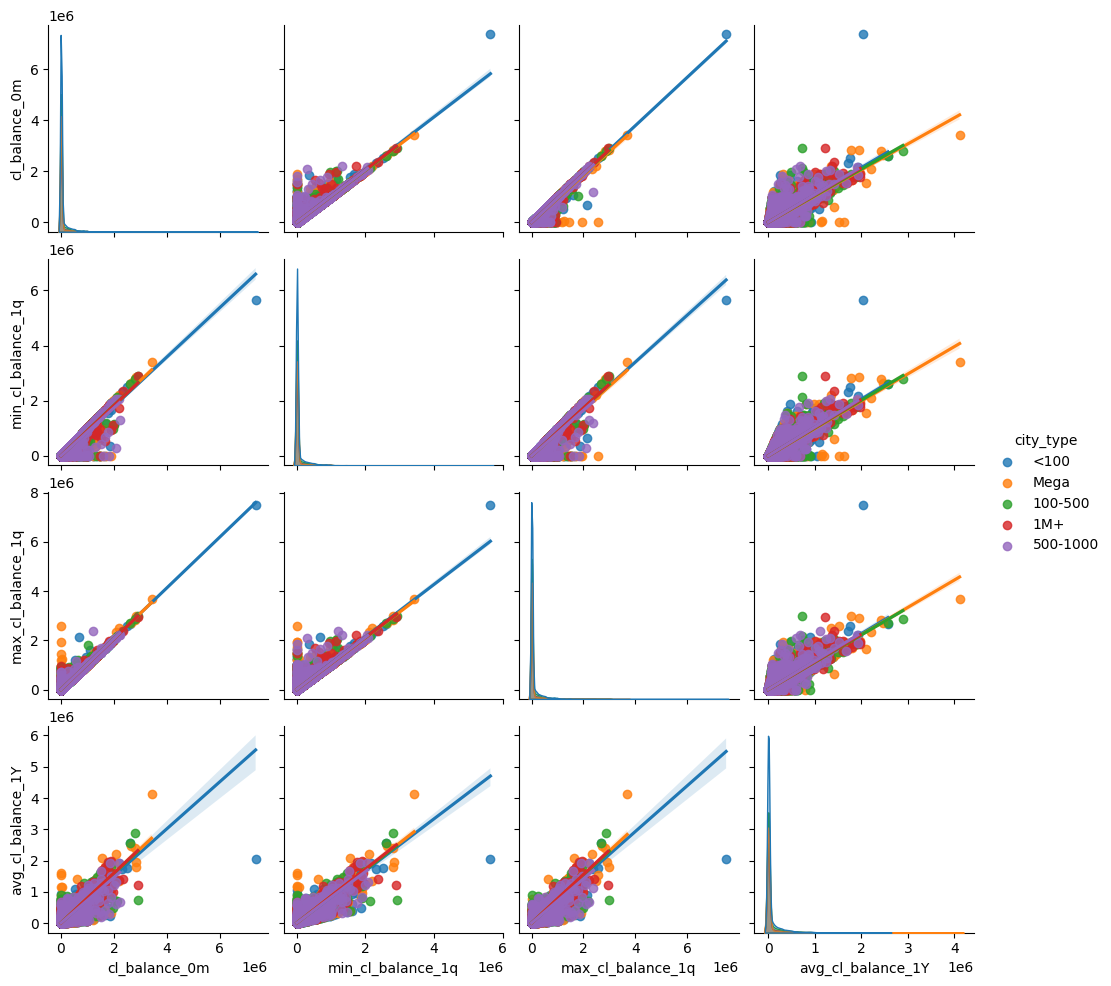

In [18]:
sns.pairplot(df, vars=['cl_balance_0m', 'min_cl_balance_1q', 'max_cl_balance_1q', 'avg_cl_balance_1Y'], hue="city_type", kind="reg");

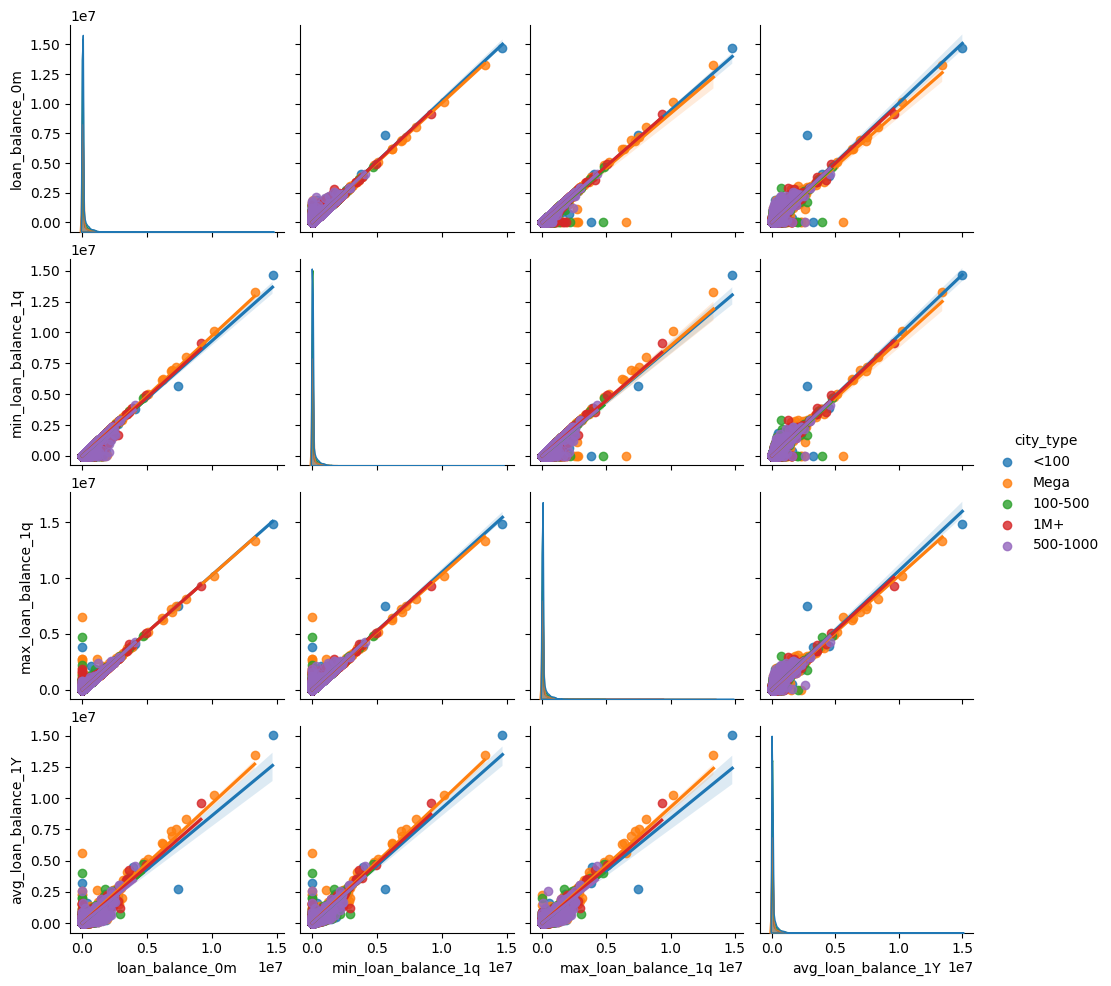

In [19]:
sns.pairplot(df, vars=['loan_balance_0m', 'min_loan_balance_1q', 'max_loan_balance_1q', 'avg_loan_balance_1Y'], hue="city_type", kind="reg");

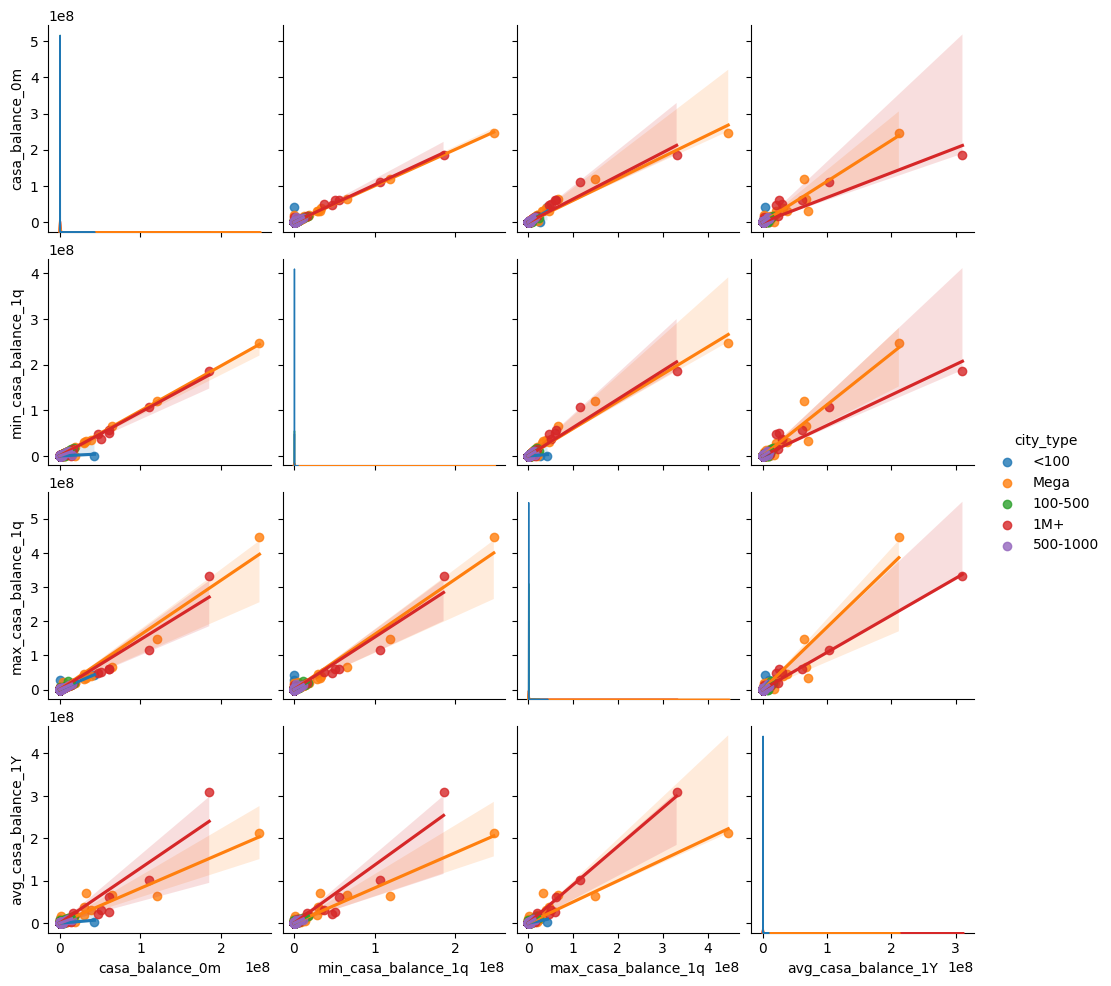

In [20]:
sns.pairplot(df, vars=['casa_balance_0m', 'min_casa_balance_1q', 'max_casa_balance_1q', 'avg_casa_balance_1Y'], hue="city_type", kind="reg");

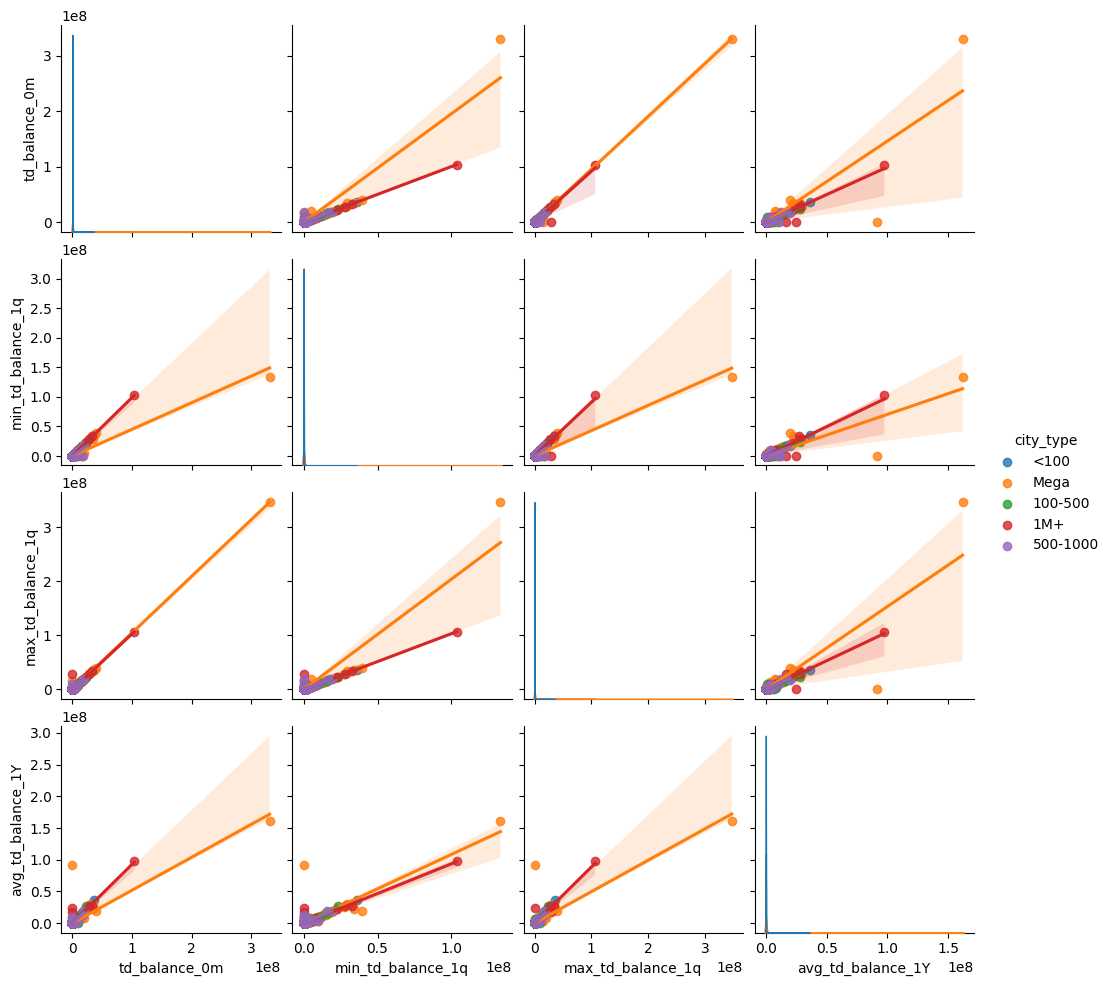

In [22]:
sns.pairplot(df, vars=['td_balance_0m', 'min_td_balance_1q', 'max_td_balance_1q', 'avg_td_balance_1Y'], hue="city_type", kind="reg");

Теперь мы можешь оставить только cl_balance_0m, loan_balance_0m, casa_balance_0m и td_balance_0m и посмотреть на общую корреляцию

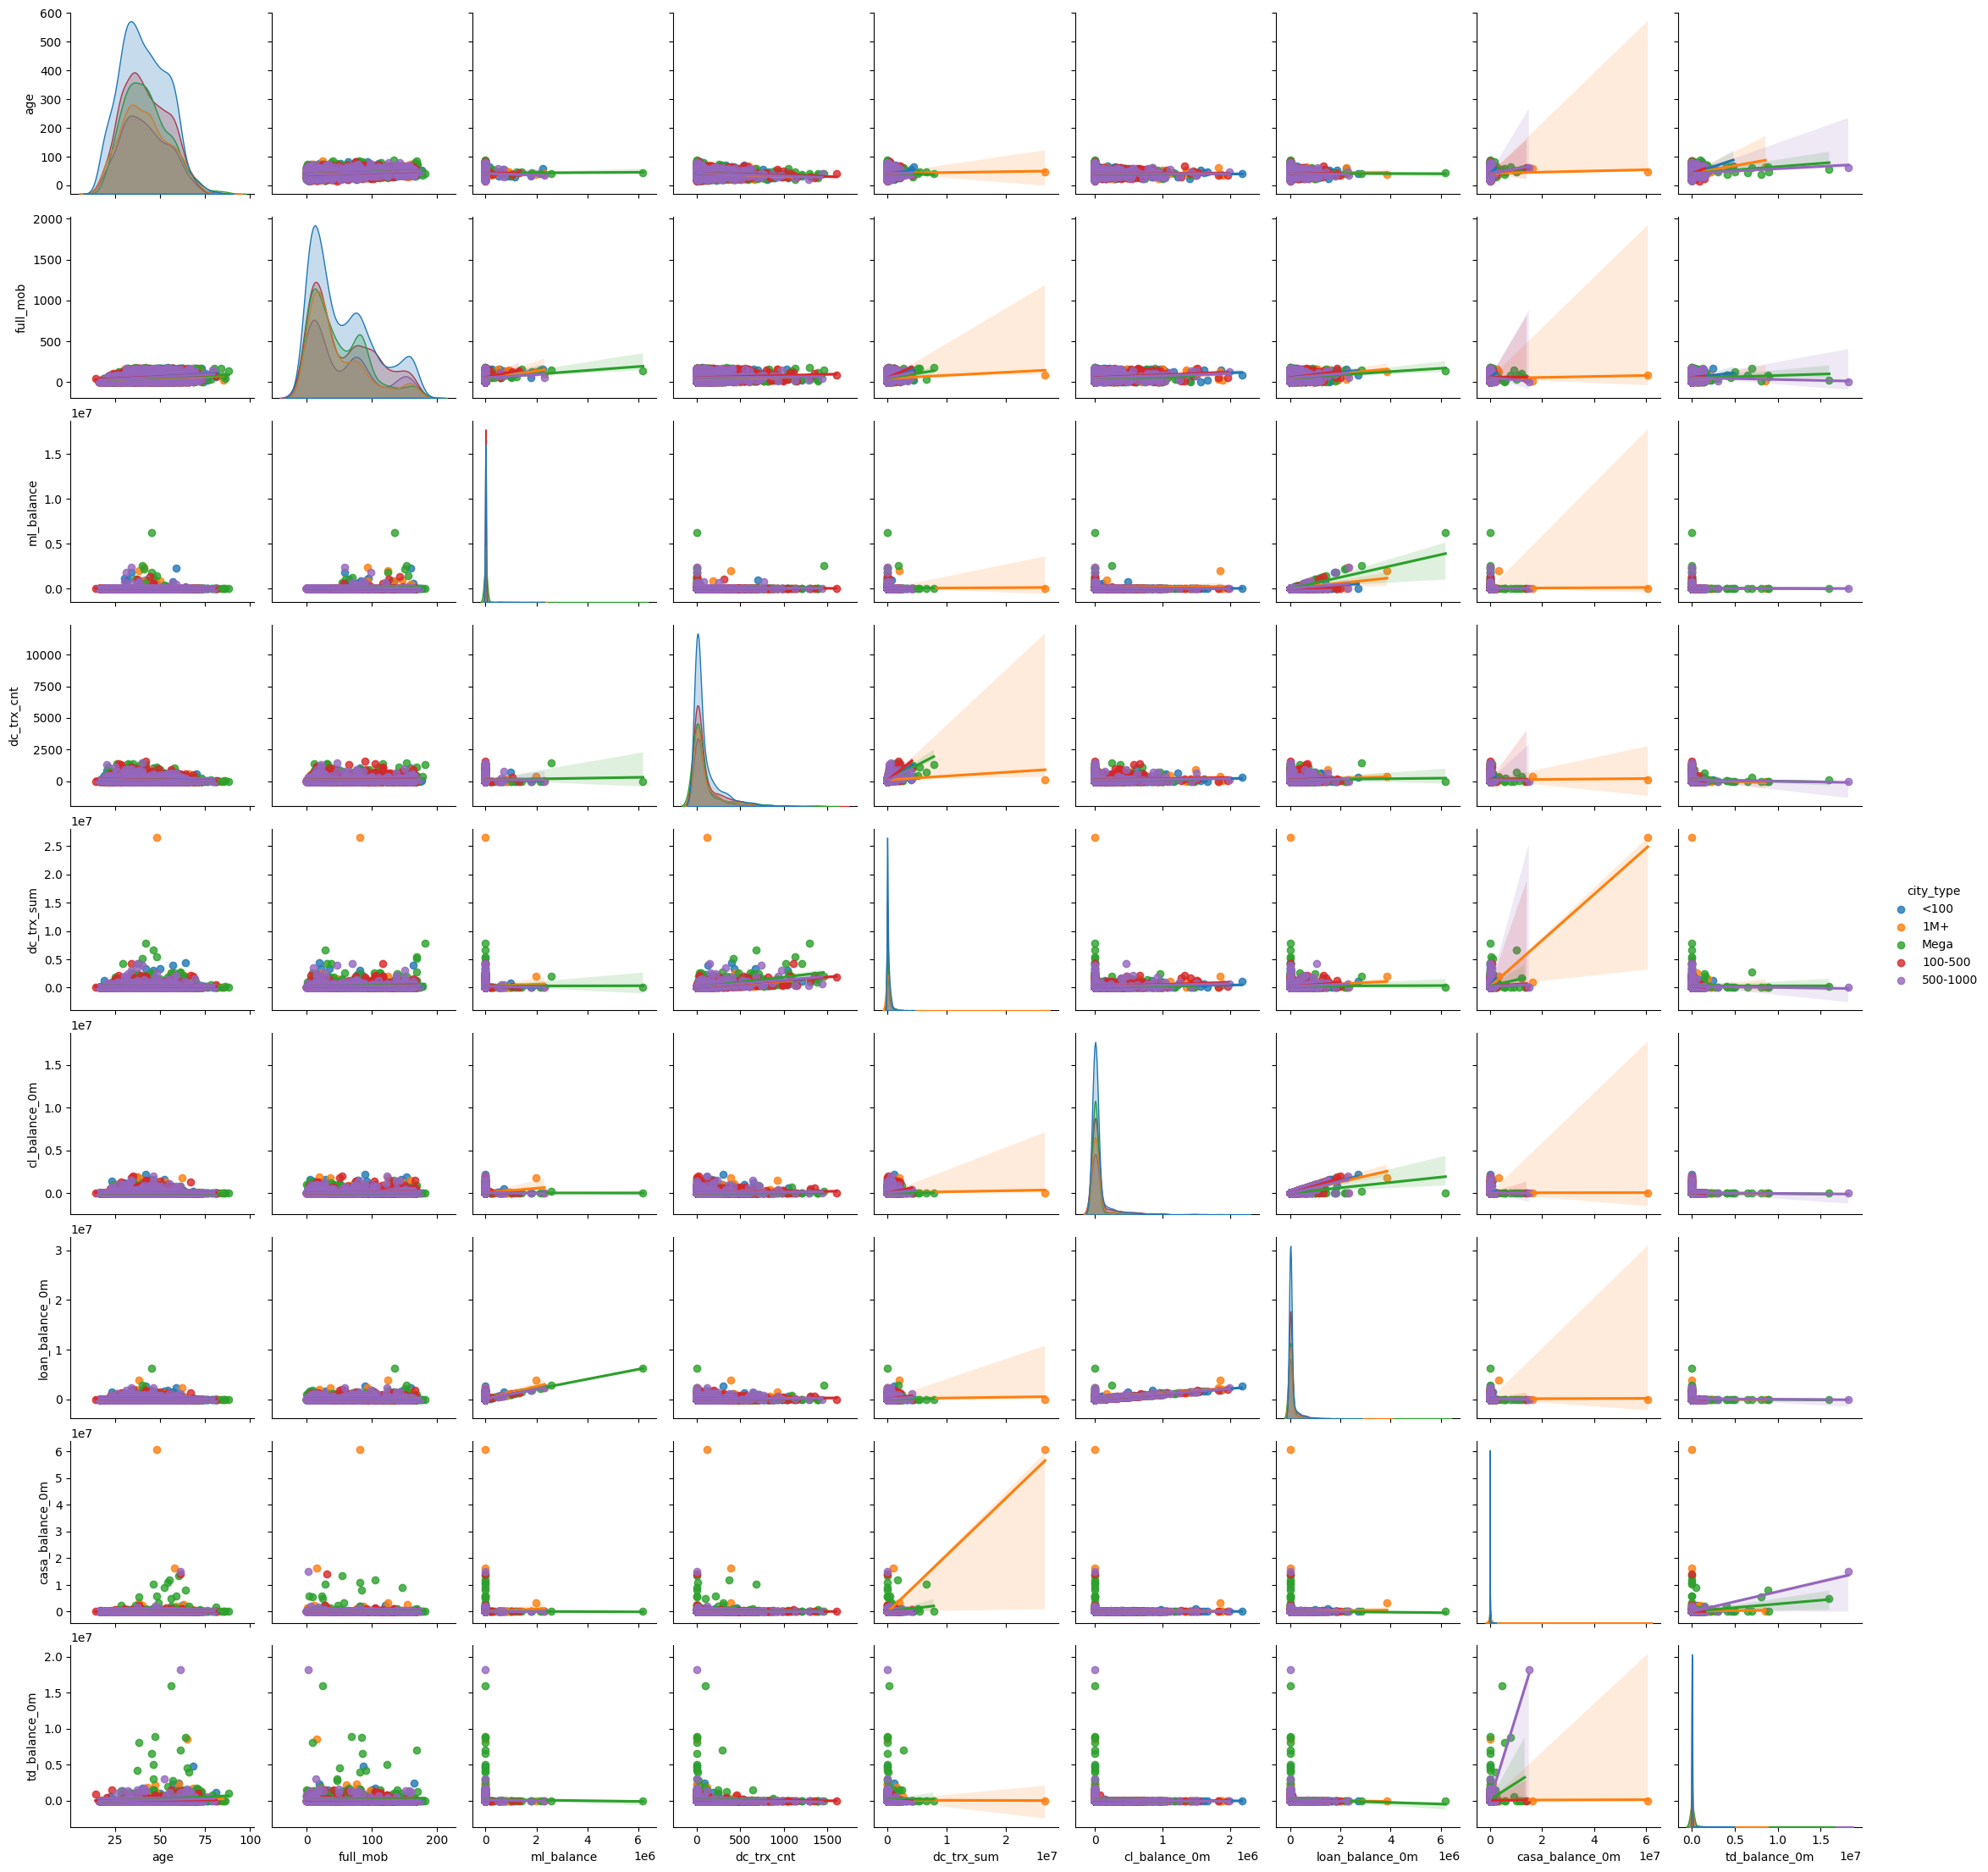

In [26]:
sns.pairplot(df.sample(frac=0.1), vars=['age', 'full_mob', 'ml_balance', 'dc_trx_cnt', 'dc_trx_sum', 'cl_balance_0m', 'loan_balance_0m', 'casa_balance_0m', 'td_balance_0m'], hue="city_type", kind="reg");

Теперь видно что loan_balance  коррелирует с ml_balance и с cl_balance но при этом ml_balance с cl_balance не коррелируют<br>
Также можно заметить что с увеличением длительности взаимодейтсвия клиента с банком увеличивается его средний возраст(что логично)

Проверим еще корреляции

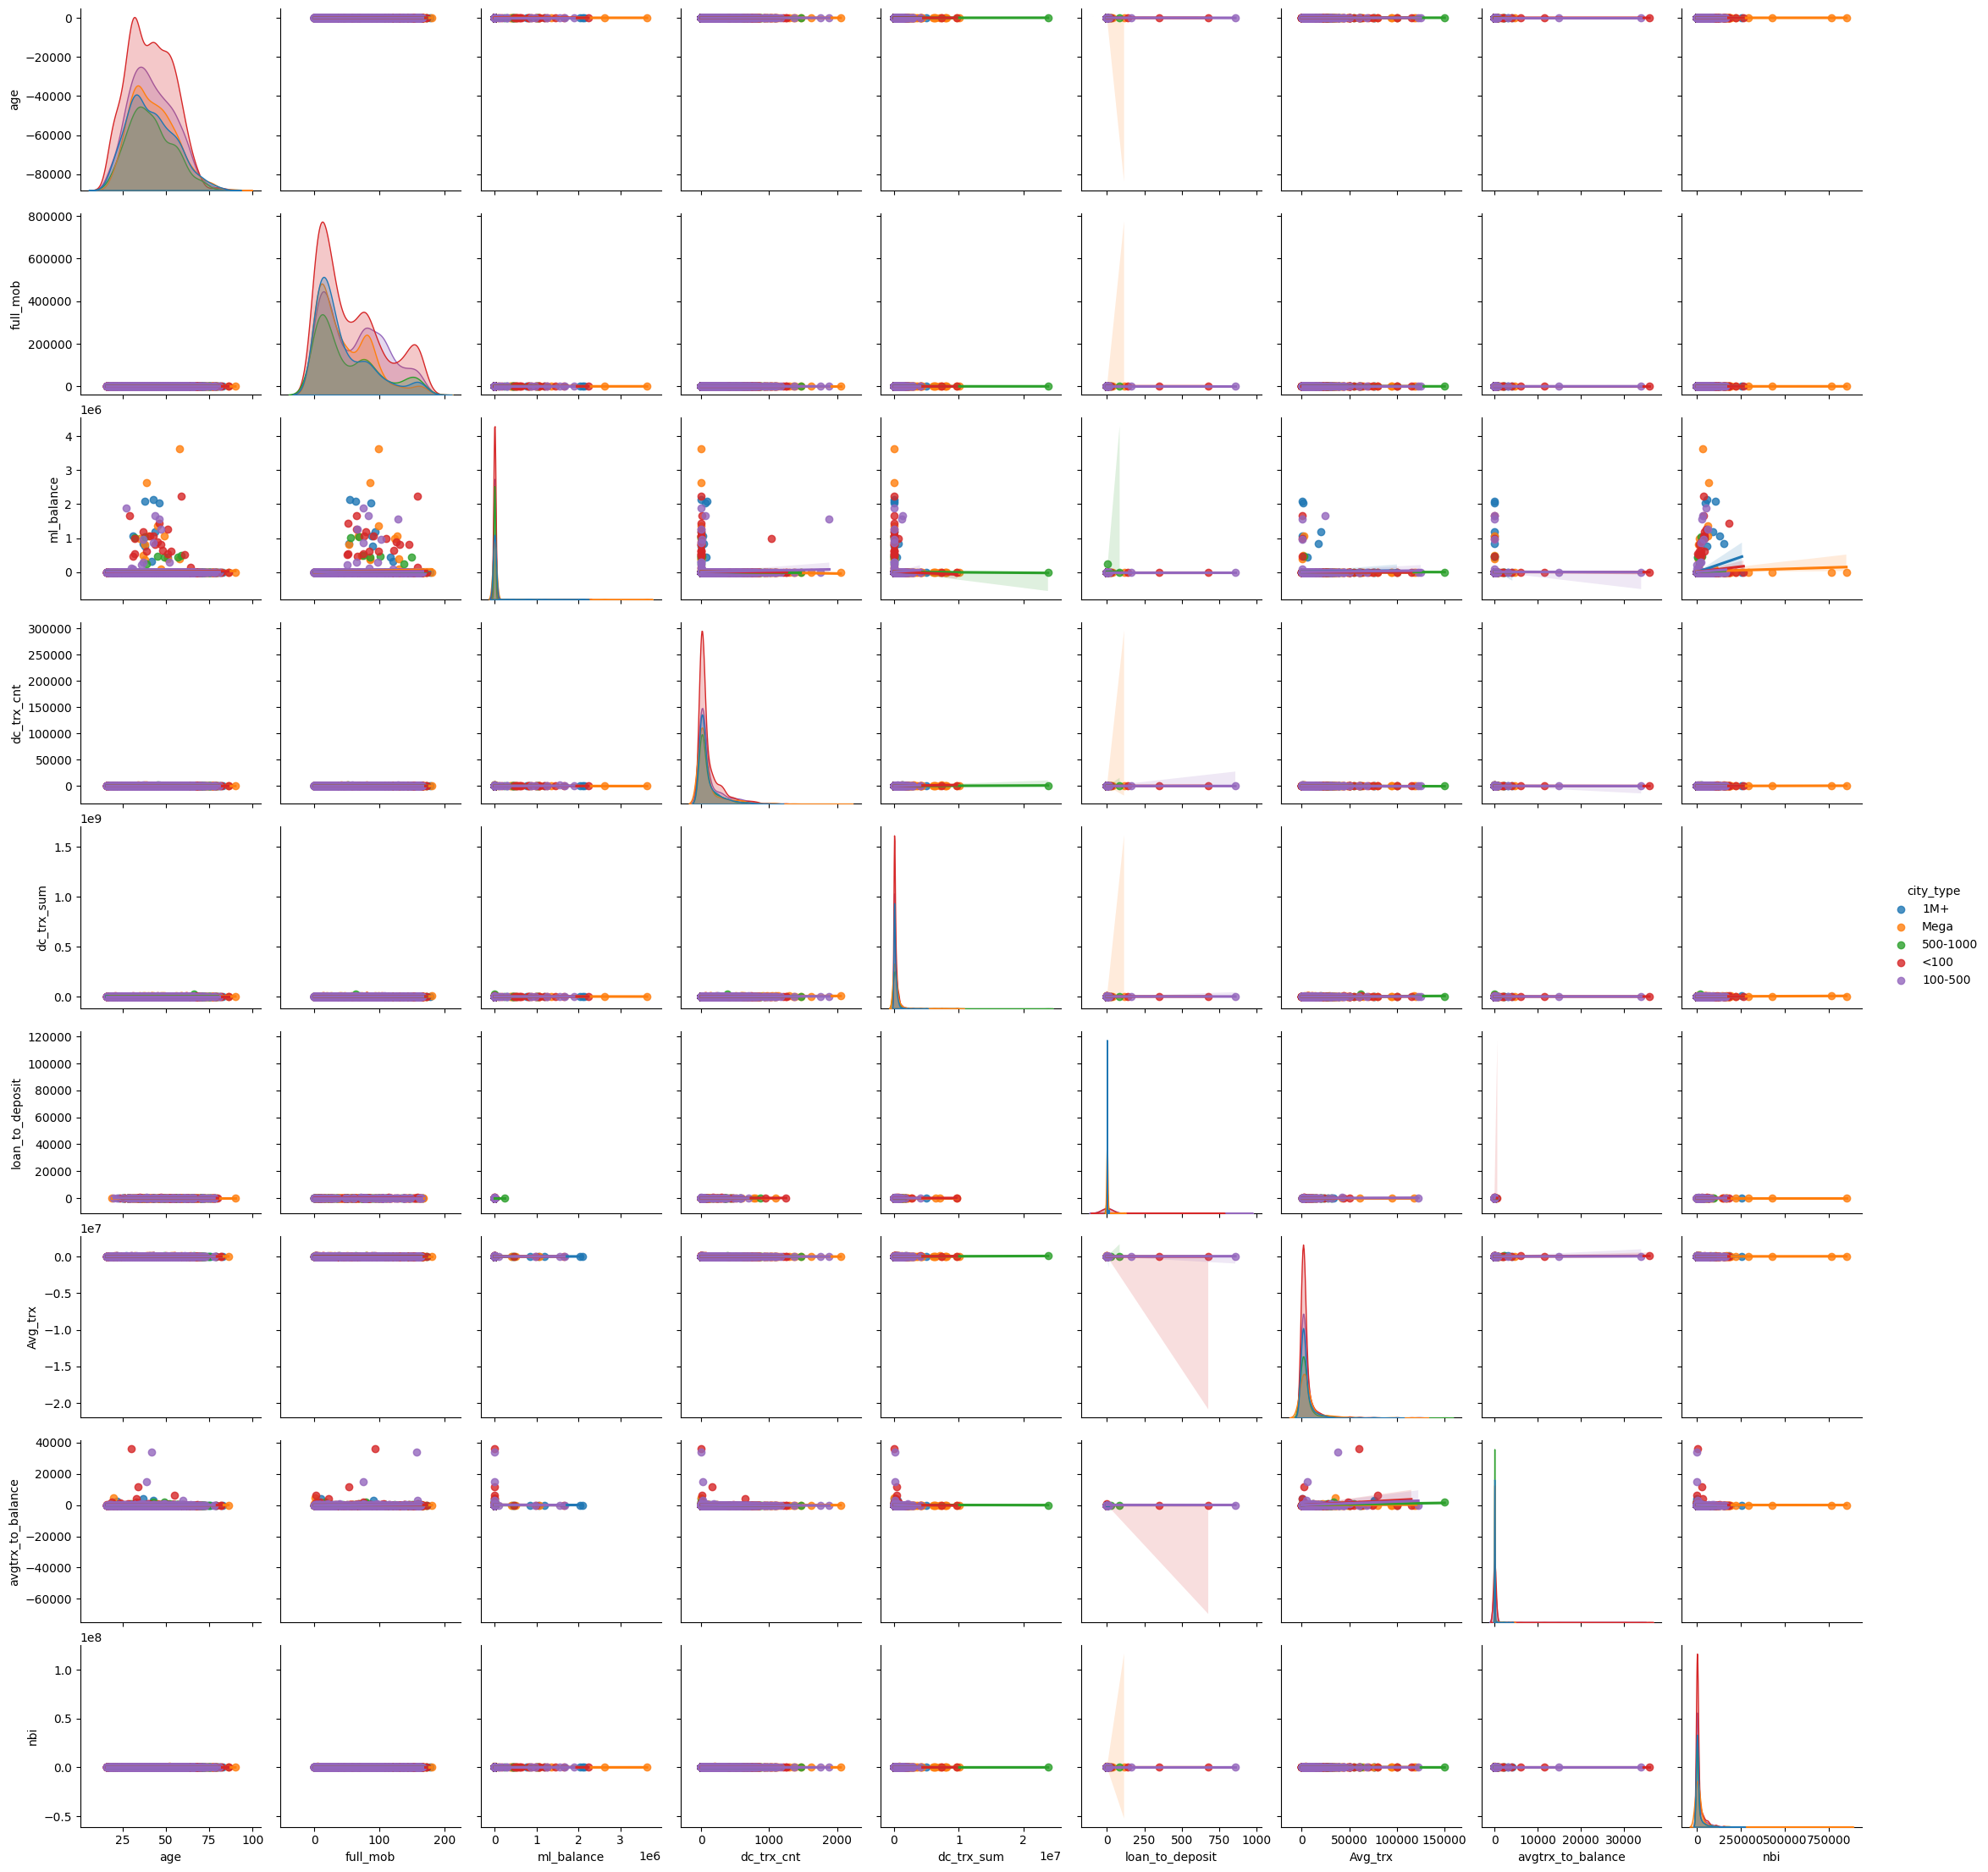

In [28]:
sns.pairplot(df.sample(frac=0.1), vars=['age', 'full_mob', 'ml_balance', 'dc_trx_cnt', 'dc_trx_sum', 'loan_to_deposit', 'Avg_trx', 'avgtrx_to_balance', 'nbi'], hue="city_type", kind="reg");

In [12]:
rcParams['figure.figsize'] = 9, 9
labels_dict = {'fontsize': 14,
               'fontweight': 'bold',
               'color': '#404000',
               'family':'Times New Roman'}

Теперь проверим вбросы

In [122]:
income = df.income.sort_values()
income

0               0.00
28278           0.00
28275           0.00
28274           0.00
28273           0.00
            ...     
9017      3216499.65
22278     4107734.49
23233     5000000.00
8315     33063482.00
45169    90600000.00
Name: income, Length: 50000, dtype: float64

In [137]:
print(round(income.cumsum().quantile(0.68), 1))
income.iloc[-1]

89838958.2


90600000.0

##### Один мужчина из выборки зарабатываетбольше чем 70% других мужчин

Удалим выбросы из выборки

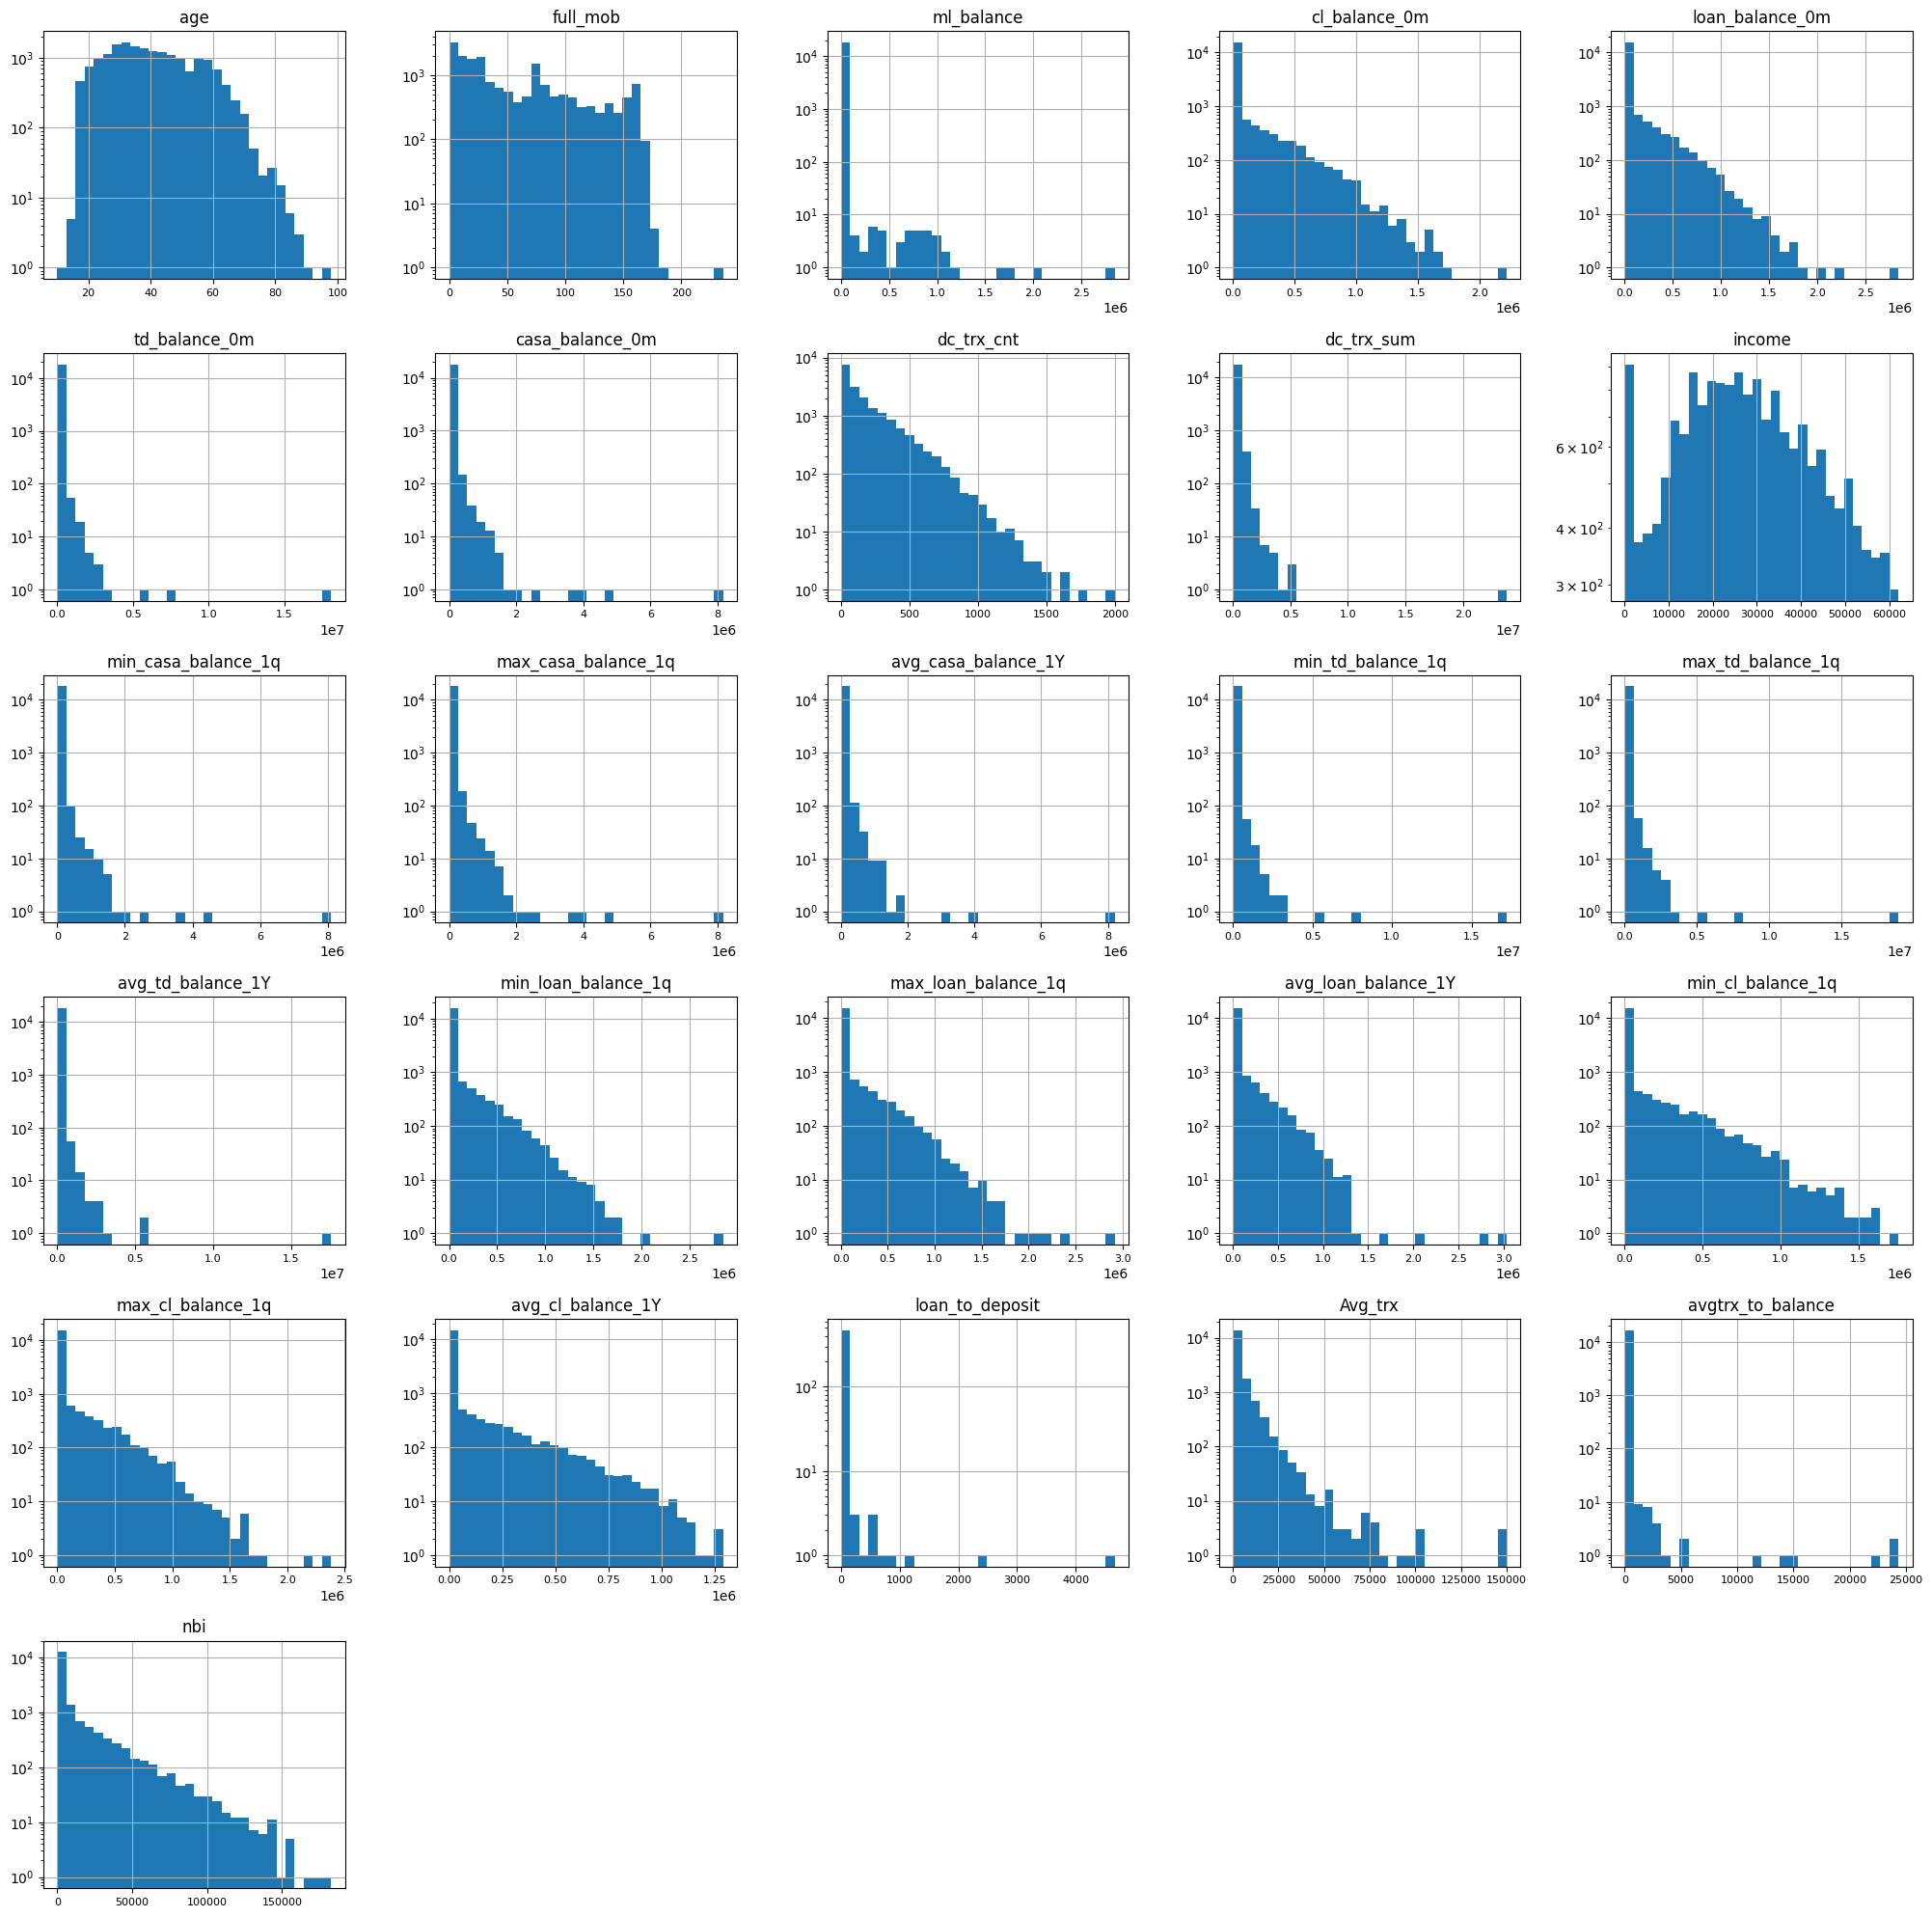

In [10]:
max_income = df.income.quantile(0.9)
min_income = df.income.quantile(0.1)
poor = df.loc[(df.income < max_income) & (df.income > min_income)]
poor.hist(bins=30, figsize=(25, 25), log=True, xlabelsize=8);

Теперь достаточно четко видно распределение по доходу, которе правда, оставляет желать лучшего

Теперь рассмотрим Средний класс

In [162]:
max_max_income = df.income.quantile(0.99)
middle = df.loc[(df.income > max_income) & (df.income < max_max_income)]
len(middle)

4500

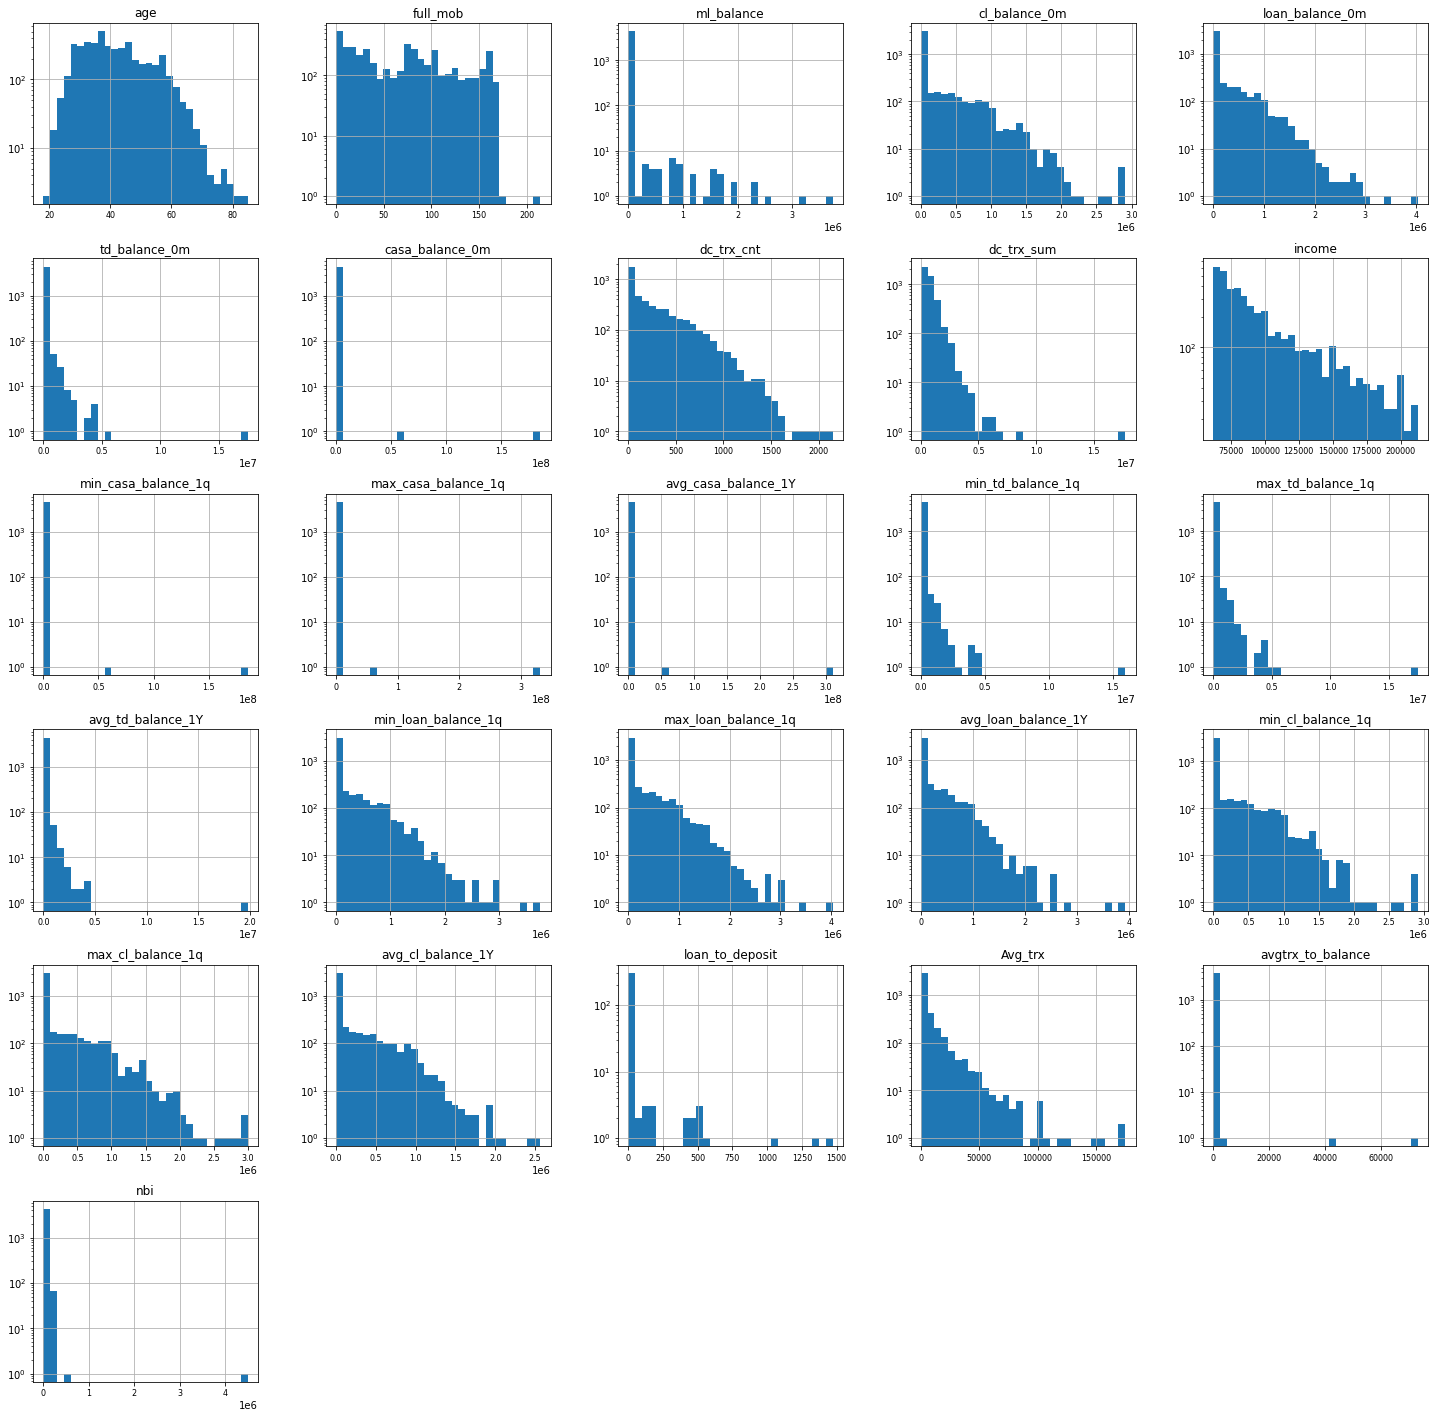

In [169]:
middle.hist(bins=30, figsize=(25, 25), log=True, xlabelsize=8);

Выше среднего

In [174]:
max_max_max_income = df.income.quantile(0.999)
whealty = df.loc[(df.income > max_max_income) & (df.income < max_max_max_income)]
len(whealty)

450

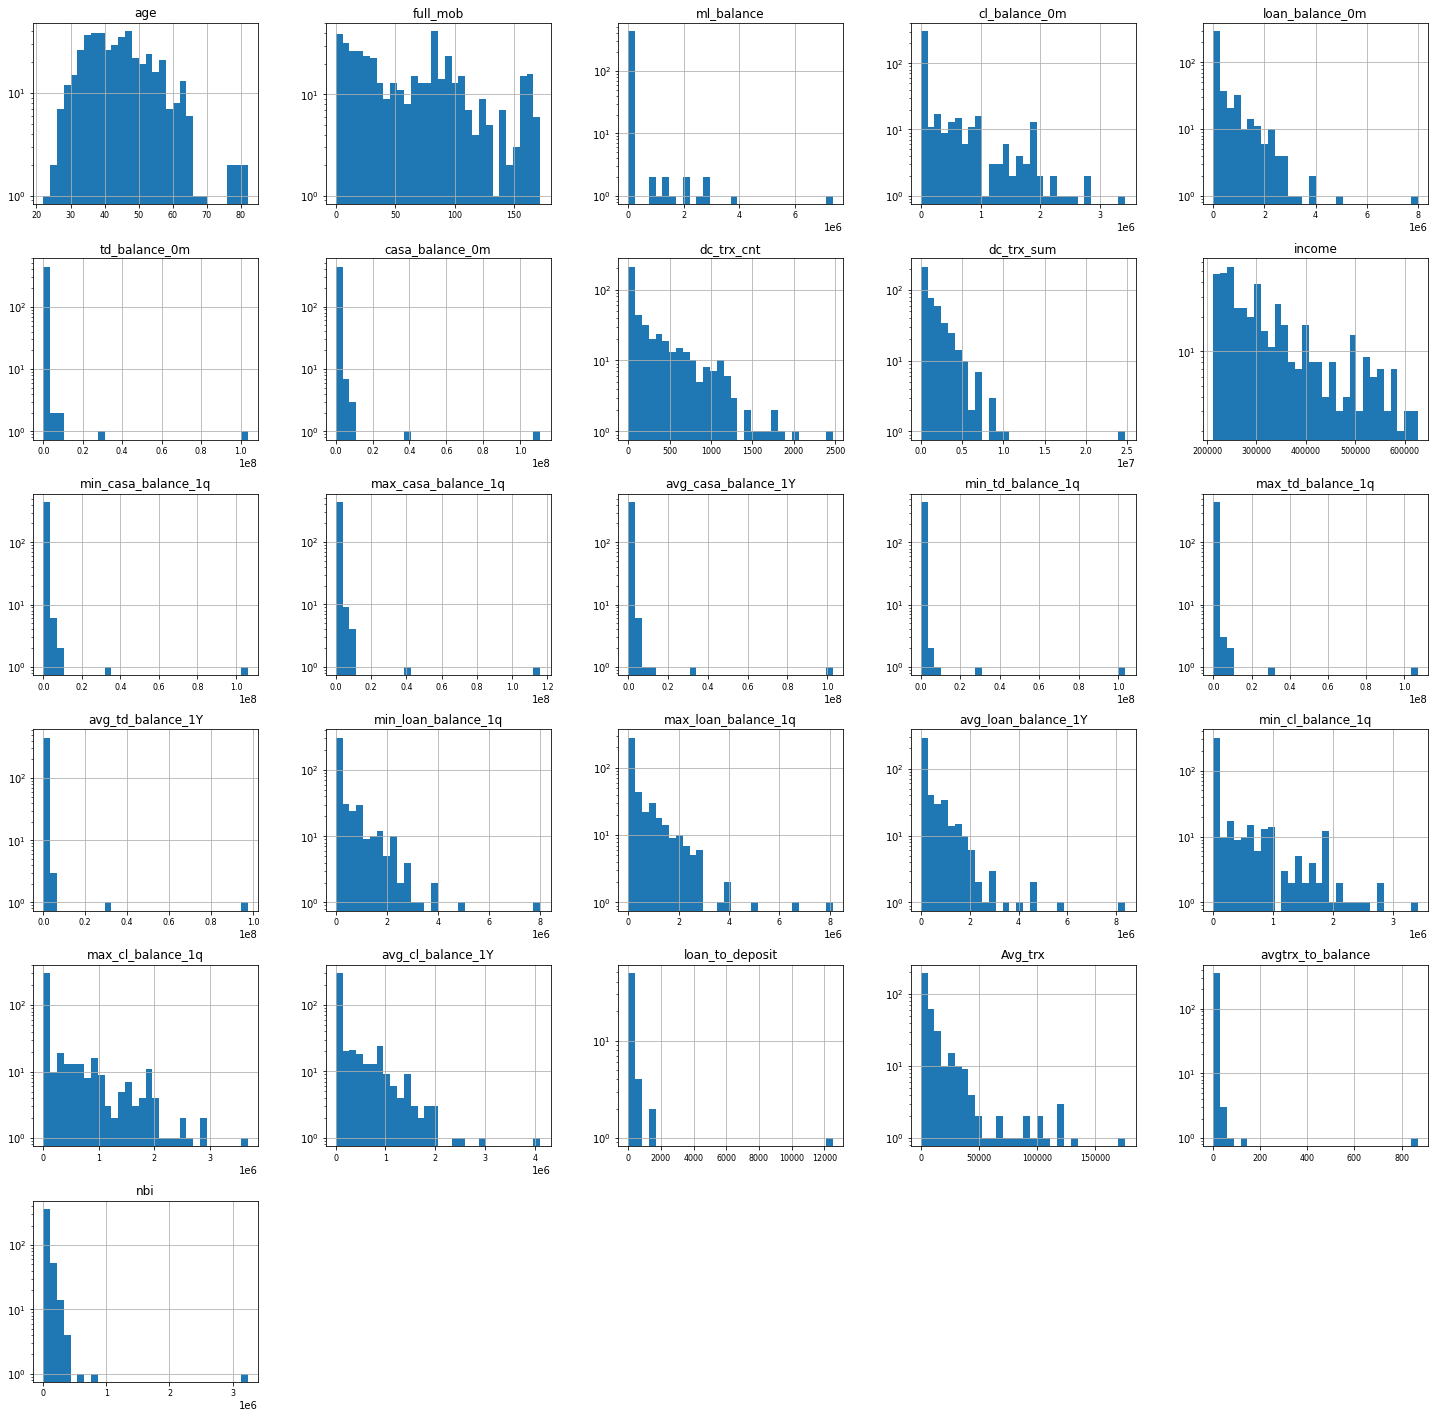

In [175]:
whealty.hist(bins=30, figsize=(25, 25), log=True, xlabelsize=8);

На последок построим зависимость трат от дохода 

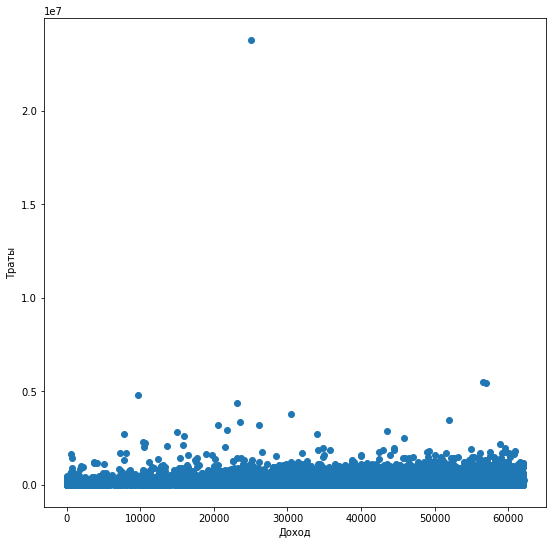

In [184]:
plt.xlabel("Доход")
plt.ylabel("Траты")
plt.scatter(poor.income, poor.dc_trx_sum);

Опять наблюдается выброс, удалим его

In [206]:
poor_without_outlier = poor[poor.dc_trx_sum < poor.dc_trx_sum.quantile(0.9)]
len(poor_without_outlier)

16397

In [ ]:
plt.xlabel("Доход")
plt.ylabel("Траты")
plt.scatter(poor_without_outlier.income, poor_without_outlier.dc_trx_sum, hue="city_type");

Здесь также виднеется достаточно четкая линейная зависимость

Для банка очевидно - ключавая задача это получение выгоды, по этому последним предметом нашего исследования будут зависимость nbi от всех остальных показателей

In [ ]:
sns.pairplot(df, y_vars=['nbi'], x_vars=['age', 'full_mob', 'ml_balance', 'dc_trx_cnt', 'dc_trx_sum', 'loan_to_deposit', 'Avg_trx', 'avgtrx_to_balance'], hue="city_type", kind="hist");

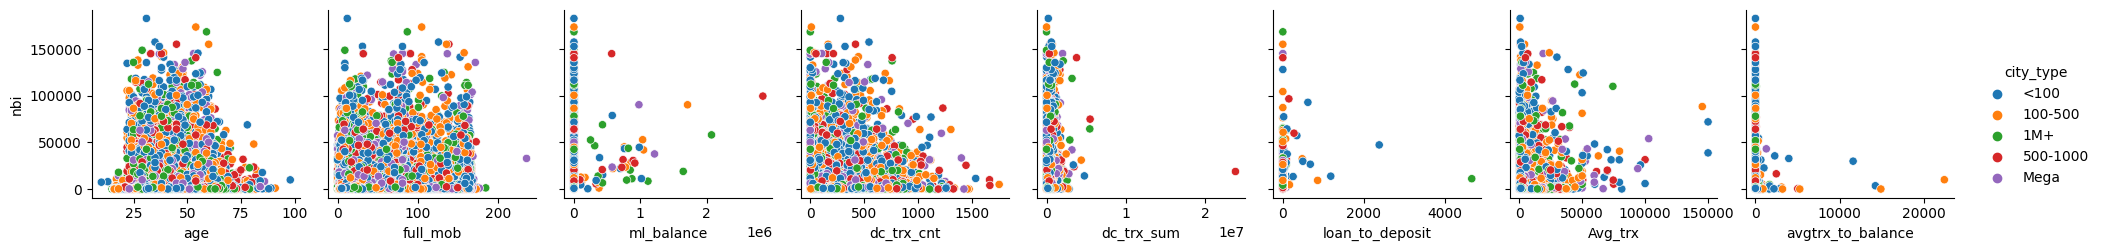

In [33]:
sns.pairplot(poor, y_vars=['nbi'], x_vars=['age','full_mob', 'ml_balance', 'dc_trx_cnt', 'dc_trx_sum', 'loan_to_deposit', 'Avg_trx', 'avgtrx_to_balance'], hue="city_type");

In [41]:
pd.pivot_table(df, index="age", values='nbi', aggfunc='sum')

,nbi
age,
4,79.627151
8,72812.547894
9,15130.725813
10,7377.322777
13,7914.083819
...,...
88,46657.822550
89,15068.604090
90,23094.977955


In [77]:
df['grouped_ages'] = df.age.round(decimals=-1)

In [78]:
df.grouped_ages

0        70
1        50
2        60
3        50
4        70
         ..
49995    60
49996    60
49997    30
49998    40
49999    30
Name: grouped_ages, Length: 50000, dtype: int64

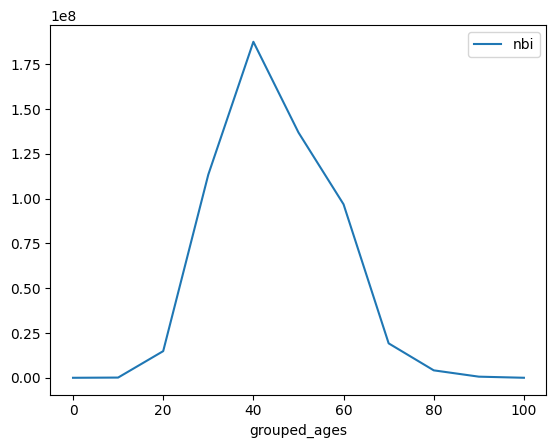

In [81]:
pd.pivot_table(df, index="grouped_ages", values='nbi', aggfunc='sum').plot();

Вывод который можно сделать - что наибольшую суммарную выгоду банк получает от лиц в возрасте ~ 40 лет

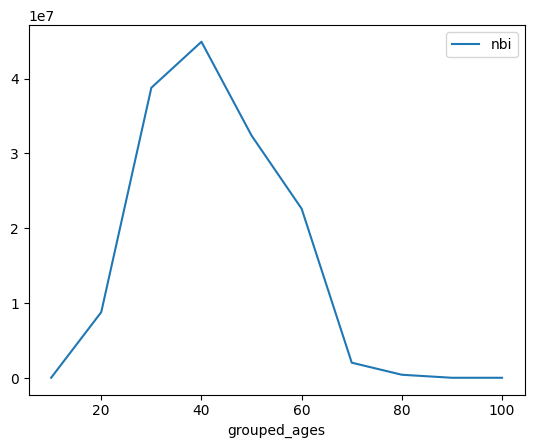

In [87]:
pd.DataFrame(poor)['grouped_ages'] = poor.age.round(decimals=-1)
pd.pivot_table(poor, index="grouped_ages", values='nbi', aggfunc='sum').plot();

В выборке из "бедных" картина похоже, но смещена в сторону более молодых(30 лет)
